# **Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**)
## Laboratorio numérico 2024

Bienvenidos al laboratorio numérico de la materia *Introducción al modelado continuo*, también conocida como *Ecuaciones de la física matemática*. En este, vamos a ver métodos numéricos para resolver distintos tipos de problemas de manera general, y su relación y aplicación a problemas específicos de la materia, de manera tal de complementar los contenidos de la cursada teórico-práctica.


# Motivación de este colab
<!-- $$\require{amsmath}$$ -->

Recordemos que estamos estudiando **sistemas dinámicos**, con reglas representadas por **ecuaciones diferenciales ordinarias (ODEs)** que describen la evolución temporal de una variable.

En este marco, es importante recordar:
* Nos concentraremos principalmente en **sistemas autónomos**, por lo que las variables no dependen explícitamente del tiempo y su evolución se define a partir de la ecuación $\dot{x}=dx/dt=f(x)$

Entonces, lo que tenemos es básicamente que buscar la manera de integrar ecuaciones diferenciales. Esto motiva a que estudiemos distintos **métodos de integración numérica**. Entonces, vamos a buscar la solución a la ecuación diferencial, $x(t)$, pero necesitamos definir la condición inicial. Esto se llama **problema de valores iniciales**.


# Métodos de integración numérica 1D

### [I. Método de Euler](#euler)
### [II. Método de Runge-Kutta](#rk4)
### [III. Método Odeint de scipy](#odeint)

<a name="euler"></a>
## I. Método de Euler

Supongamos que tenemos una ecuación diferencial de esta forma:

$$
\frac{dx}{dt} = f(t, x)
$$

El método de Euler consiste en aproximar la derivada por el cociente incremental: $\frac{dx}{dt} \simeq \frac{\Delta x}{\Delta t}$:

$$
\frac{x(t+\Delta t) - x(t)}{\Delta t} = f(t, x)
$$

$$
x(t+\Delta t) = x(t)+f(t, x)\Delta t
$$

Esto define una regla que prescribe una aproximación para el valor de $x$, después de cierto tiempo, en base a la condición inicial y el valor de la derivada (campo vector).

Podemos definir un paso temporal discreto $h$, por lo que nos queda una regla iterativa para integrar el $x$ de a pasos discretos

$${x}_{n+1} = {x}_{n} + h f(t_{n},{x}_{n})$$

Notar que es como aproximar a la variable por su desarrollo de Taylor de orden 1, donde me muevo un paso $h$ para donde me dice la derivada primera (que es el campo vector por la ODE). Necesito una condición inicial.

**Ejemplo:** Veamos una aplicación como ejemplo para el **modelo de Gompertz** del ejercicio 3 de la guía 1:

$$
\dot{N} = -aNln(bN)
$$

$$
\frac{N(t + \Delta t) - N(t)}{\Delta t} = -aN(t) ln(bN(t))
$$

$$
N(t + \Delta t) = N(t) -aN(t) ln(bN(t))\Delta t
$$

Para resolver esto tenemos que definir la condición incial y el paso temporal. Qué les parece que puede pasar si cambiamos sus valores?

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Definimos el valor de los parámetros del modelo
a = 1
b = 1
# Damos el paso de integración o evolución
dt = 0.1
# Damos el vector de los tiempos para los que vamos a calcular N
t = np.arange(0, 10, step=dt)
# Nos armamos un vector N donde vamos a ir guardando los resultados de la integración. Por ahora son todos ceros. Lo vamos llenando al ir evolucionando con Euler.
N = np.zeros_like(t)
# Fijamos una condición inicial de N, dandole valor al primer punto
N[0] = 3
#Y ahora sí ya hacemos la evolución de la formulita
for i in range(len(t)-1):
    # Calculamos el siguiente punto usando el método de Euler (t -> i ; t+dt -> i+1)
    N[i + 1] = -a*np.log(b*N[i])*N[i] * dt + N[i]


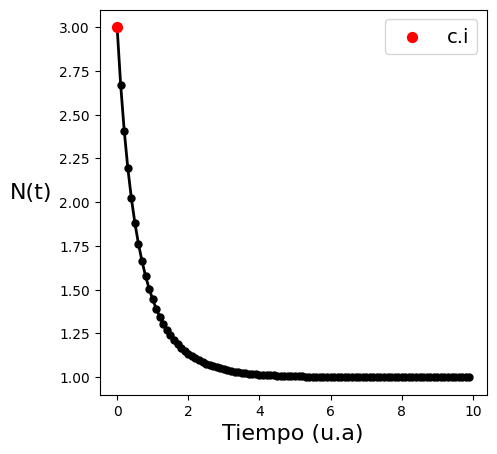

In [11]:
# Graficamos
plt.figure(figsize=(5,5))
plt.plot(t, N, 'k.-', lw=2, markersize=10)
plt.scatter(t[0], N[0], color="red", s=50, label="c.i", zorder=3) # Hacemos el puntito de c.inicial
plt.xlabel("Tiempo (u.a)", fontsize=16)
plt.ylabel("N(t)", fontsize=16, rotation=0, labelpad=20)
plt.legend(fontsize=14)
plt.show()

**Paso temporal**

En general, cuando uso el método de integración de Euler, tengo que calibrar con cuidado el paso temporal, para asegurarme de no estar haciendo cualquier cosa. Una forma de hacer esto es hacer la integración para pasos temporales sucesivamente menores, hasta notar (con algún criterio) que la integración no cambia sustancialmente al refinar el paso temporal.

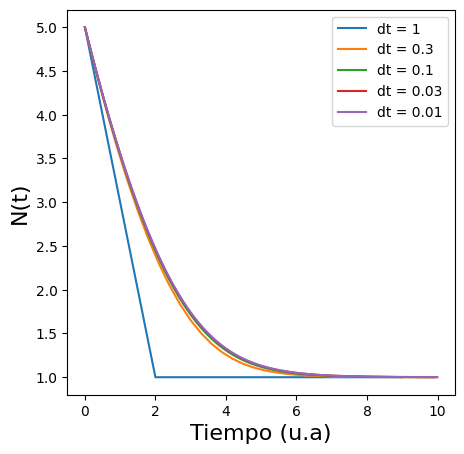

In [14]:
varios_dt = [1, 0.3, 0.1, 0.03, 0.01]
plt.figure(figsize=(5,5))
for dt in varios_dt:
    # Para cada paso de integración hacemos el proceso
    t = np.arange(0, 10, step=dt)
    a = 1
    b = 1
    N = np.zeros_like(t)
    # Fijamos una condición inicial, dandole valor al primer punto
    N[0] = 5
    for i in range(len(t)-1):
        # Calculamos el siguiente punto usando el método de Euler (t -> i ; t+dt -> i+1)
        N[i + 1] = -a*np.log(b*N[i])*dt + N[i]
    # Le agregamos una etiqueta a cada curva para saber que dt le correspondía
    plt.plot(t, N, label='dt = {}'.format(dt))
plt.xlabel("Tiempo (u.a)", fontsize=16)
plt.ylabel("N(t)", fontsize=16)
plt.legend()
plt.show()

**Condiciones iniciales**

Integremos ahora para varias condiciones iniciales.

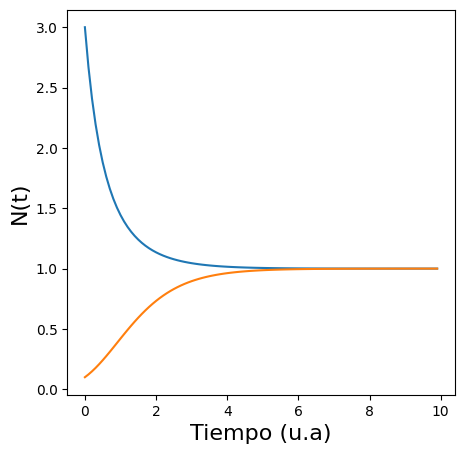

In [6]:
# Damos el valor de parametros y paso de integracion
a = 1
b = 1
dt = 0.1
# Damos el vector de los tiempos para los que vamos a calcular N
t = np.arange(0, 10, step=dt)
# Definimos el vector N1, por ahora son todos ceros. Lo vamos llenando al ir evolucionando con Euler.
N1 = np.zeros_like(t)
# Damos la condicion inicial de N1.
N1[0] = 3
# Y ahora sí ya hacemos la evolución de la formulita.
for i in range(len(t)-1):
    N1[i + 1] = -a*N1[i]*np.log(b*N1[i]) * dt + N1[i]

# Ahora integramos para otra condicion inicial
N2 = np.zeros_like(t)
# Damos otra condicion inicial
N2[0] = 0.1
# La integramos
for i in range(len(t)-1):
    N2[i + 1] = -a*N2[i]*np.log(b*N2[i]) * dt + N2[i]

#Y ahora mostramos las dos
plt.figure(figsize=(5,5))
plt.plot(t, N1)
plt.plot(t, N2)
plt.xlabel("Tiempo (u.a)", fontsize=16)
plt.ylabel("N(t)", fontsize=16)
plt.show()

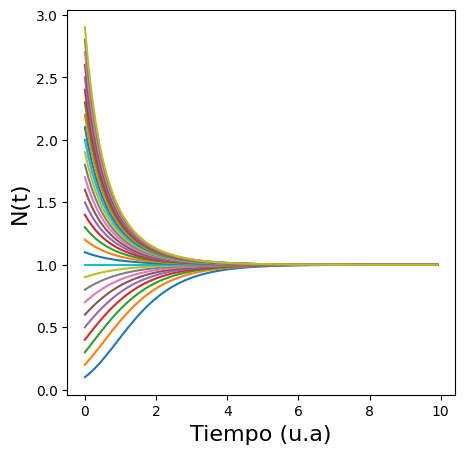

In [7]:
# Y también podríamos hacer un loop y que nos integre muchas condiciones iniciales
condiciones_iniciales = np.arange(0.1,3,0.1)
plt.figure(figsize=(5,5))

for ci in condiciones_iniciales:
    N = np.zeros_like(t)
    # Damos la condicion inicial de N.
    N[0] = ci
    # Y ahora sí ya hacemos la evolución de la formulita.
    for i in range(len(t)-1):
        N[i + 1] = -a*N[i]*np.log(b*N[i]) * dt + N[i]
    plt.plot(t, N)
plt.xlabel("Tiempo (u.a)", fontsize=16)
plt.ylabel("N(t)", fontsize=16)
plt.show()

### Ejercicio 1

Escriba una función llamada `odeEuler` que tome como argumentos de entrada el campo vector `f(x)`, la condición inicial `ci`, el paso de integración `h` seteado por default como 0.1, y el tiempo total de integración `tmax` seteado por default como 10. La función debe devolver el vector de tiempos y los valores de la variable en cada paso.

In [15]:
# # # COMPLETAR
def odeEuler(f, ci, h=0.1, tmax=10):
  tiempos = np.arange(0, tmax, step=h)
  valores = np.zeros_like(t)
  valores[0] = ci
  for i in range(len(t)-1):
    valores[i + 1] = f(valores[i])*h + valores[i]
  return tiempos, valores

Pruebe la función para integrar el **modelo de Gompertz** para los parámetros y condiciones iniciales previamente usados (defina una función `gompertz` con el modelo de antes para ingresar al integrador).

In [21]:
def gompertz(f, a=1, b=1):
    return -a*f*np.log(b*f)

# Damos el paso de integración o evolución
h = 0.1
# Fijamos una condición inicial de N, dandole valor al primer punto
ci = 3
odeEuler(gompertz, ci, h)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
        5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
        6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
        7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
        9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
 array([3.        , 2.67041631, 2.40811884, 2.19648231, 2.02365053,
        1.88100278, 1.76216008, 1.6623266 , 1.57784414, 1.50588507,
        1.44423702, 1.39114959, 1.3452235 , 1.30532953, 1.27054831,
        1.24012521, 1.21343619, 1.18996152, 1.16926559, 1.1509811 ,
        1.13479661, 1.12044672, 1.10770416, 1.09637351, 1.086286  ,
        1.07729541, 1.06927455, 1.0621125 , 1.05571223, 1.04998862,
        1.04486684, 1.0402

<a name="rk4"></a>
## II. Método de [Runge Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)

Así como podía pensar el método de Euler como una aproximación con Taylor de orden 1, podría considerar generalizar el método para ordenes superiores. Pero esto requiere el cálculo de derivadas, lo cual es un problema. Una alternativa es el método de punto medio que consiste básicamente en usar Euler, pero usando la información de la derviada en el punto medio de un paso de Euler. Este método es de orden 2 y pertence a una familia llamada métodos de **Runge-Kutta**.

$${x}_{n+1} = {x}_{n} + h f(t_n + \frac{h}{2}, x_n + \frac{h}{2} f(t_{n},{x}_{n}))$$

El método de Runge-Kutta de orden 4 (RK4) sigue la misma lógica, definiendo 4 evaluaciones intermedias:

$$k_1 = f(t_n, x_n)\\
k_2 = f\left(t_n + \frac{h}{2}, x_n + \frac{h}{2} k_1\right)\\
k_3 = f\left(t_n + \frac{h}{2}, x_n + \frac{h}{2} k_2\right)\\
k_4 = f(t_n + h, x_n + h k_3)$$

La actualización de $x$ se realiza mediante:

$$x_{n+1} = x_n + \frac{h}{6} (k_1 + 2k_2 + 2k_3 + k_4)$$

RK4 es el caballito de batalla de los integradores numéricos, pero, como todo, tiene sus ventajas y desventajas, y va a funcionar mejor o peor según el sistema.

Escribimos una función para usar este método. Esta función ejecuta la integración de **un paso temporal**. Los argumentos que requiere son: i) campo vector (**función**) ii) valor de las variables en el tiempo t, iii) paso temporal.

Los últimos dos (\*args, **kwargs) son para que, en caso de que sus campos vectores tengan argumentos, se los puedan pasar a la función y los sepa manejar (más, adelante).


In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def rk4(dxdt, x, t, dt, *args, **kwargs):
    x = np.asarray(x)
    k1 = np.asarray(dxdt(x, t, *args, **kwargs))*dt
    k2 = np.asarray(dxdt(x + k1*0.5, t, *args, **kwargs))*dt
    k3 = np.asarray(dxdt(x + k2*0.5, t, *args, **kwargs))*dt
    k4 = np.asarray(dxdt(x + k3, t, *args, **kwargs))*dt
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

Veamoslo con el ejemplo de Gompertz. Primero definimos el campo vector. Este tiene que ser una **función** que devuelva la derivada en el punto (o una lista con las derivadas de cada componente).

In [24]:
def dNdt(N, t):
    return -N*np.log(N)

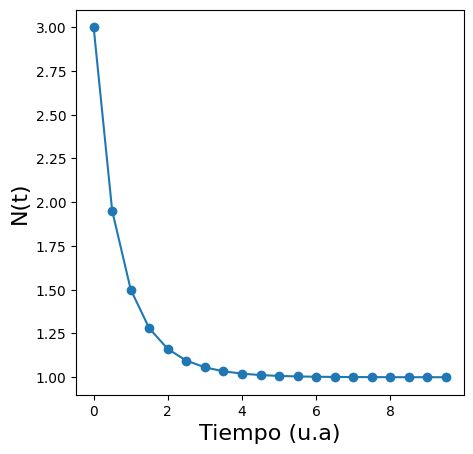

In [25]:
# Definimos el paso temporal y el vector de tiempos
dt = 0.5
t = np.arange(0, 10, step=dt)
# Damos la condición inicial
N0 = 3
# Nos creamos un vector para guardar la solución
Nrk = np.zeros_like(t)
Nrk[0] = N0
for ix, tt in enumerate(t[:-1]):
    # Avanzamos un paso temporal
    Nrk[ix+1] = rk4(dNdt, Nrk[ix], tt, dt)
plt.figure(figsize=(5,5))
plt.plot(t, Nrk, 'o-')
plt.xlabel("Tiempo (u.a)", fontsize=16)
plt.ylabel("N(t)", fontsize=16)
plt.show()

De nuevo, es una buena práctica chequear que al achicar el paso de integración no cambie el resultado

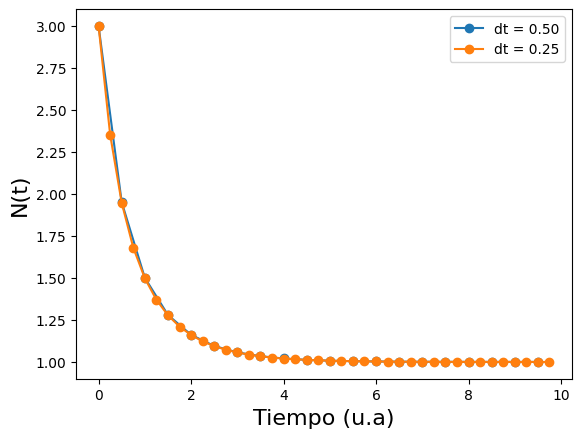

In [26]:
# Definimos el paso temporal y el vector de tiempos
dt = 0.5
t = np.arange(0, 10, step=dt)
# Damos la condición inicial
N0 = 3
# Nos creamos un vector para guardar la solución
Nrk = np.zeros_like(t)
Nrk[0] = N0
for ix, tt in enumerate(t[:-1]):
    # Avanzamos un paso temporal
    Nrk[ix+1] = rk4(dNdt, Nrk[ix], tt, dt)
plt.plot(t, Nrk, 'o-', label='dt = {:.2f}'.format(dt))

dt2 = 0.25
t2 = np.arange(0, 10, step=dt2)
# Damos la condición inicial
N0 = 3
# Nos creamos un vector para guardar la solución
Nrk = np.zeros_like(t2)
Nrk[0] = N0
for ix, tt in enumerate(t2[:-1]):
    # Avanzamos un paso temporal
    Nrk[ix+1] = rk4(dNdt, Nrk[ix], tt, dt2)

plt.plot(t2, Nrk, 'o-', label='dt = {:.2f}'.format(dt2))
plt.xlabel("Tiempo (u.a)", fontsize=16)
plt.ylabel("N(t)", fontsize=16)
plt.legend()
plt.show()

Con parámetros

In [27]:
def rk4(dxdt, x, t, dt, *args, **kwargs):
    x = np.asarray(x)
    k1 = np.asarray(dxdt(x, t, *args, **kwargs))*dt
    k2 = np.asarray(dxdt(x + k1*0.5, t, *args, **kwargs))*dt
    k3 = np.asarray(dxdt(x + k2*0.5, t, *args, **kwargs))*dt
    k4 = np.asarray(dxdt(x + k3, t, *args, **kwargs))*dt
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

In [28]:
def dNdt_ab(N, t, a, b):
    return -a*N*np.log(b*N)

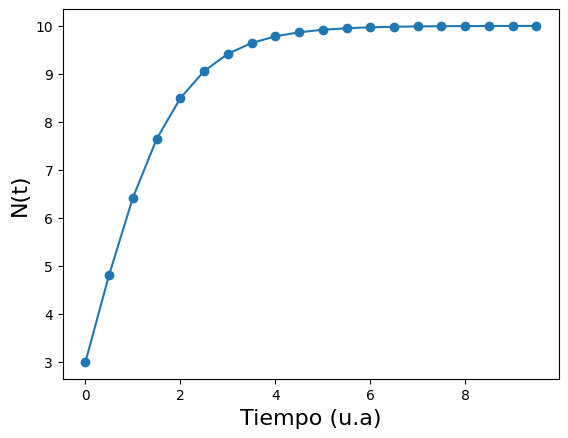

In [29]:
a = 1
b = 0.1
dt = 0.5
t = np.arange(0, 10, step=dt)
# Damos la condición inicial
N0 = 3
# Nos creamos un vector para guardar la solución
Nrk = np.zeros_like(t)
Nrk[0] = N0
for ix, tt in enumerate(t[:-1]):
    # Avanzamos un paso temporal
    Nrk[ix+1] = rk4(dNdt_ab, Nrk[ix], tt, dt, a, b)
plt.plot(t, Nrk, 'o-', label='dt = {:.2f}'.format(dt))
plt.xlabel("Tiempo (u.a)", fontsize=16)
plt.ylabel("N(t)", fontsize=16)
plt.show()

### Ejercicio 2

Muestre los resultados de integrar el problema anterior para distintos valores del parámetro b.

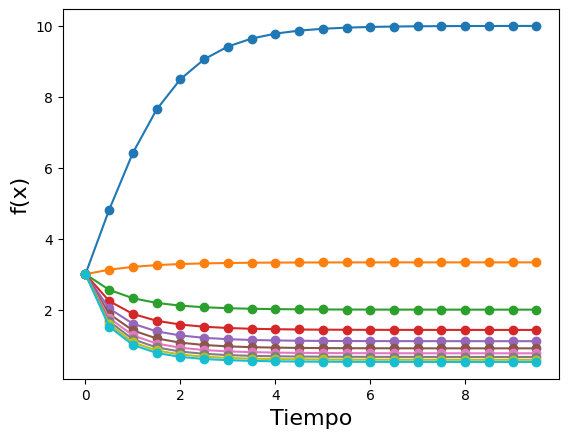

In [58]:
a = 1
b = np.arange(0.1, 2, step=0.2)
for bi in b:
  dt = 0.5
  t = np.arange(0, 10, step=dt)
  # Damos la condición inicial
  N0 = 3
  # Nos creamos un vector para guardar la solución
  Nrk = np.zeros_like(t)
  Nrk[0] = N0
  for ix, tt in enumerate(t[:-1]):
      # Avanzamos un paso temporal
      Nrk[ix+1] = rk4(dNdt_ab, Nrk[ix], tt, dt, a, bi)
  plt.plot(t, Nrk, 'o-', label='dt = {:.2f}'.format(dt))
plt.xlabel("Tiempo", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.show()

### Ejercicio 3

Usando RK4, integre y encuentre las soluciones para distintas condiciones iniciales y para distintos valores de $r$ del sistema:

$\dot{x}=f(x)=rx-x^{3}$

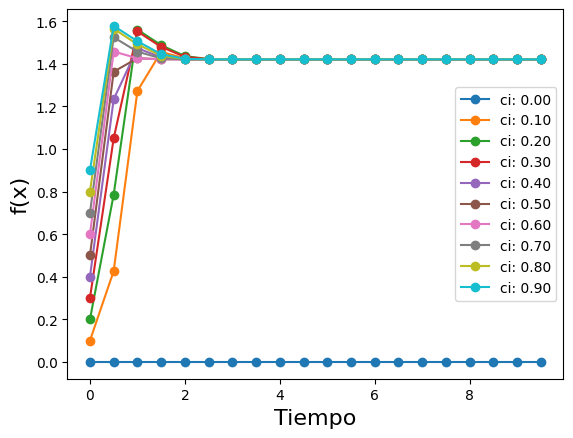

In [70]:
def sistema3(x,t,r):
  return r*x-x**3

r = np.arange(-5, 5, step=0.5)
cis = np.arange(0, 1, step=0.1)
#for ri in r:
ri = 3
for ci in cis:
  dt = 0.5
  t = np.arange(0, 10, step=dt)
  # Damos la condición inicial
  N0 = ci
  # Nos creamos un vector para guardar la solución
  Nrk = np.zeros_like(t)
  Nrk[0] = N0
  for ix, tt in enumerate(t[:-1]):
      # Avanzamos un paso temporal
      Nrk[ix+1] = rk4(sistema3, Nrk[ix], tt, dt, ri)
  plt.plot(t, Nrk, 'o-', label='ci: {:.2f}'.format(ci))
plt.legend()
plt.xlabel("Tiempo", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.show()

<a name="odeint"></a>
## III. Odeint

Hay diversos métodos, más o menos precisos y que funcionan para diversos sistemas. Scipy trae un integrador bastante bueno llamado [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) (no teman a la documentación).

In [ ]:
from scipy.integrate import odeint

El odeint necesita que le digamos cómo calcular la derivada en cada punto (tenemos que darle la **función** campo vector como primer argumento), las condiciones iniciales (segundo argumento) y los tiempos donde queremos que integre y nos de el resultado.

Se invoca de la siguiente forma:

```
odeint(campo vector, condiciones iniciales, vector de tiempos)
```

Donde el primer argumento es el campo vector (definido de la forma que lo hicimos arriba), el segundo es la condición inicial (o una lista con las condiciones iniciales de cada variable) y el tercero es una lista de tiempos donde queremos que nos dé el resultado de la integración.

El integrador necesita que definamos el campo vector de cierta forma para que pueda interpretarlo correctamente. En particular, el **primer** argumento que reciba tiene que ser la variable (o una lista con las variables). El **segundo** argumento tiene que ser el tiempo (aunque no aparezca explícitamente en las ecuaciones). Luego pueden ponerse argumentos adicionales (si los hay).

Para el caso 1D. Tomemos como ejemplo la ecuación:

$$ \dot{x} = -x^{2} + 4 $$

In [ ]:
def dxdt(x, t):
    return -x**2 + 4

In [ ]:
dt = 0.1
t = np.arange(0, 5, step=dt)
x0 = 10
solucion = odeint(dxdt, x0, t)  # odeint hace algo y su output lo guardamos en la variable "solucion"

Veamos la forma de lo que nos devuelve el odeint:

In [ ]:
print(solucion.shape)
x = solucion[:, 0]
print(x)

Grafiquemos la solución:

In [ ]:
plt.plot(t, x)
plt.show()

**Paso temporal** (Ojo con el dt!!)

Atención! Para odeint, el vector de tiempos solo le dice en qué momentos queremos que devuelva el resultado de la integración. El paso temporal real lo va a ir ajustando sin avisarnos!

Para convencernos comparemos 2 integraciones con tiempos muy distintos:

In [ ]:
# Graficamos la solución que teníamos de antes, con paso temporal "chico"
plt.plot(t, x)
# Hacemos otra integración con paso temporal "grande"
dt = 1
t2 = np.arange(0, 5, step=dt)
x0 = 10
sol2 = odeint(dxdt, x0, t2)
x2 = sol2[:, 0]
plt.plot(t2, x2, 'o')
plt.show()

**Ecuaciones con parámetros, cómo pasarle argumentos al odeint**

Una de las cosas que nos suele interesar es analizar como cambian los flujos cuando cambiamos algún parámetro. Para eso está bueno tener una función definida y pasarle el parámetro que queremos ir moviendo como un argumento. Esto se puede hacer con el odeint, agregando un argumento (una tupla) cuando lo llamamos:

```
x = odeint(campo_vector, xi, t, args=(parametro1, parametro2))
```

Para que esto funcione, nuestro campo vector tiene que saber cómo tomar esos parámetros! Por eso tenemos que definirlo con:

```
def campo_vector(x, t, parametro1, parametro2)
```

Veamos el ejemplo del switch bioquímico, donde el campo vector se definía como:

$$
\dot{x} = s-rx+\dfrac{x^2}{1+x^2}
$$
con (r, s) dos parámetros que vamos a ir variando.

In [ ]:
# Definimos el campo vector, con los dos parámetros r y s
def campo_vector(x, t, r, s):
    dxdt = s - r*x + x**2/(1+x**2)
    return dxdt

# Definimos tiempo máximo, paso y un vector de tiempos
tmax = 50.
dt = 1./100
t = np.arange(0, tmax, dt)

# Le damos algún valor a los dos parámetros
r = 0.5
s = 0

# Nos preparamos varias condiciones iniciales
Xi = np.linspace(0, 4, 10)
for xi in Xi:
    # Para cada una de las condiciones iniciales hacemos la integración
    x = odeint(campo_vector, xi, t, args=(r, s))
    # Ploteamos. Python automáticamente va a ir cambiando el color en cada vuelta
    plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x')


Ahora para un valor fijo de condición inicial, vemos qué pasa si cambiamos el valor de uno de los parámetros

In [ ]:
# Nos armamos una lista de valores para r
rs = np.linspace(0.1, 3, 4)
# Ponemos un única condición inicial
xi = 4
for r in rs:
    # Para cada valor del parámetro hacemos la integración
    x = odeint(campo_vector, xi, t, args=(r, s))
    # Graficamos y le ponemos una etiqueta a cada curva para reconocerlas
    plt.plot(t, x, label=r'r = {:.2f}; s = {:.2f}'.format(r, s))
# Le pedimos que nos muestre las etiquetas que generamos
plt.legend()

Rehagamos el ejercicio de Gompertz:

In [ ]:
def dNdt(N, t):
    return -N*np.log(N)

In [ ]:
dt = 0.1
t = np.arange(0, 10, step=dt)
N0 = 3
sol = odeint(dNdt, N0, t)

Veamos qué es lo que nos devuelve:

In [ ]:
print(sol)

Si queremos convertilo en la lista "bonita" podemos hacer lo siguiente (esta forma de escribirlo nos va a servir cuando lo hagamos en 2D!)

In [ ]:
N = sol[:, 0]
print(N)
plt.plot(t, N)


## Error de truncamiento local

Sea $y_1$ la aproximación de $y(t_1)$ mediante un paso de algún método numérico que utilice un tamaño de paso $h = t_1 - t_0$. El **error de truncamiento (local)** (para la ecuación diferencial y el método dados) es

$$
E(h) = | y(t_1) - y_1 |
$$

La palabra *local* significa que estamos viendo solo un paso del método y la palabra *truncamiento* tiene que ver con el truncamiento de la serie de Taylor.

La mayoría de los métodos numéricos se basan en la serie de Taylor, por lo que el error puede expresarse en términos del teorema de Taylor. Por ejemplo, considere la serie de Taylor hasta el orden $p$ evaluada en $t_1 = t_0 + h$:

$$
y(t_1) = y(t_0) + y'(t_0)h + \cdots + \frac{y^{(p)}(t_0)}{p!} h^p + \frac{y^{(p+1)}(c)}{(p+1)!} h^{p+1}
$$

para algún $c \in [t_0,t_1]$. Si un método numérico calcula $y(t_1)$ utilizando el polinomio de Taylor de grado $p$, entonces el error de truncamiento local es

$$
E(h) = | y(t_1) - y_1 | = \frac{| y^{(p+1)}(c) |}{(p+1)!} h^{p+1}
$$

Por lo tanto, podemos decir aproximadamente que un método numérico es de orden $p$ si el error de truncamiento local se parece a $Ch^{p+1}$ para alguna constante $C$.

Más precisamente, un método numérico es de **orden** $p$ si el error de truncamiento local satisface

$$
E(h) \leq C h^{p+1}
$$

para *cualquier* ecuación $y' = f(t,y)$, $y(t_0)=y_0$. La constante $C$ depende de $f$. Nótese que el orden es un entero positivo.

Generalmente es bastante difícil determinar el orden de un método numérico dada la fórmula. En cambio, podemos determinar el orden experimentalmente. La idea es que el error de truncamiento local debe satisfacer

$$
E(h) \approx C h^{p+1}
$$

cuando se aplica a la mayoría de las ecuaciones diferenciales. Por lo tanto, podemos observar la pendiente en el gráfico log-log:

$$
\log(E(h)) \approx (p+1) \log(h) + \log(C)
$$

El procedimiento para determinar experimentalmente el orden $p$ de un método numérico es:

1. Aplicar el método numérico a la ecuación $y' = y,y(0)=1$ para diferentes tamaños de paso $h_1$ y $h_2$.
2. Calcular los errores de truncamiento locales $E(h_1)$ y $E(h_2)$ utilizando la solución exacta $y(t)=e^t$.
3. Calcule la pendiente del gráfico logarítmico:

$$
p+1 \approx \frac{\log(E(h_2)) - \log(E(h_1))}{\log(h_2) - \log(h_1)}
$$

### El método de Euler es de orden 1

El método de Euler se construye utilizando el polinomio de Taylor de grado 1. El teorema de Talyor dice:

$$
y(t_1) = y(t_0) + y'(t_0)(t_1 - t_0) + \frac{y''(c)}{2}(t_1 - t_0)^2
$$

para algún $c \in [t_0,t_1]$. Por lo tanto, si $|y''(t)|\leq K_2$ para todo $t \in [t_0,t_1]$, entonces

$$
E(h) = \left| \frac{y''(c)}{2}(t_1 - t_0)^2 \right| \leq \frac{K_2 h^2}{2}
$$

Por lo tanto, el método de Euler es de orden 1. Verifiquemos experimentalmente el orden del método de Euler trazando el error de truncamiento local para el método de Euler aplicado a $y'=y$, $y(0)=1$.

In [ ]:
f = lambda y: y
y0 = 1;
h = [0.1,0.05,0.01,0.005,0.001]
E = np.zeros(len(h))
for n in range(0,len(h)):
    t_grid, y = odeEuler(f, y0, h[n])
    y1 = y[1]
    y1_exact = np.exp(h[n])
    E[n] = np.abs(y1_exact - y1)

plt.loglog(h,E,'b.-'), plt.grid(True)
plt.title("Método de Euler, $y'=y,y(0)=1$")
plt.xlabel("$h$"), plt.ylabel("Error de truncamiento local")
plt.show()

El gráfico logarítmico tiene pendiente 2 como se esperaba a partir de la fórmula de error y verificamos que el método de Euler es de orden 1.


### Ejercicio 4

Busque mostrar que RK4 es de orden 4

In [ ]:
# # # COMPLETAR